<a href="https://colab.research.google.com/github/shaad4224/credit_card_default_prediction/blob/main/Copy_of_credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/capstone/default of credit card clients.xls - Data.xlsx - default of credit card clients..csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.shape

(30000, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [9]:
len(df[df.duplicated()])

0

In [10]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [12]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
df['IsDefaulter'].value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

<Axes: xlabel='IsDefaulter', ylabel='count'>

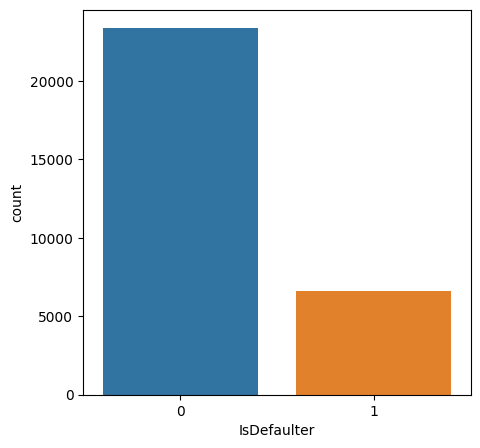

In [14]:
#values count plot of IsDefaulter
plt.figure(figsize=(5,5))
sns.countplot(x = 'IsDefaulter', data = df)

<Axes: xlabel='SEX', ylabel='count'>

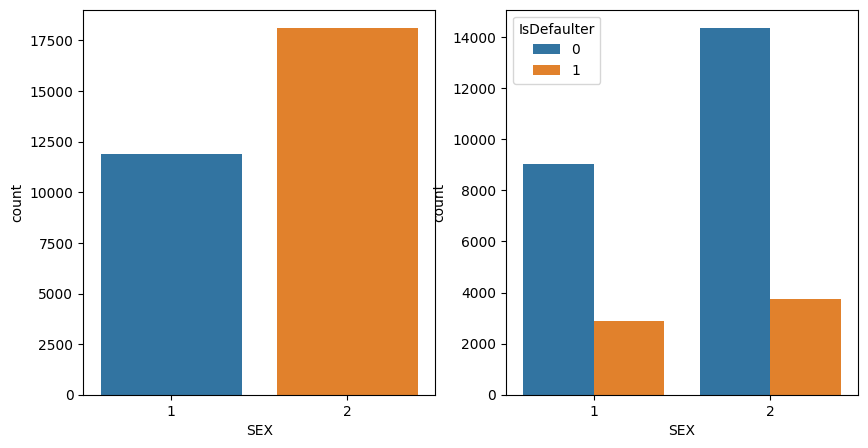

In [15]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = df)

In [16]:
#category wise values
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [17]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

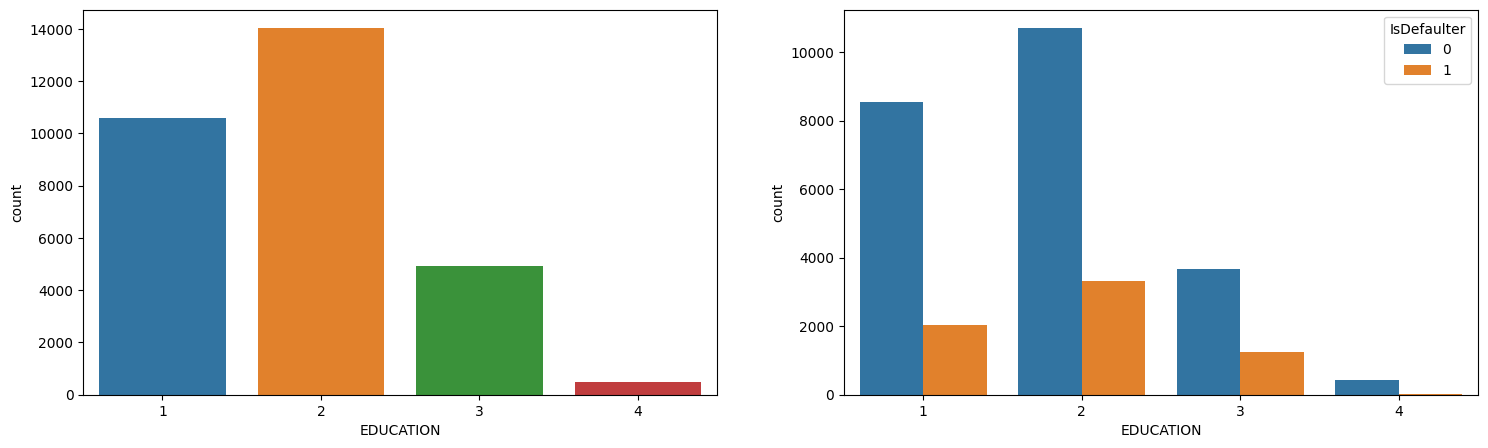

In [18]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = df)

In [19]:
#category wise values
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [20]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

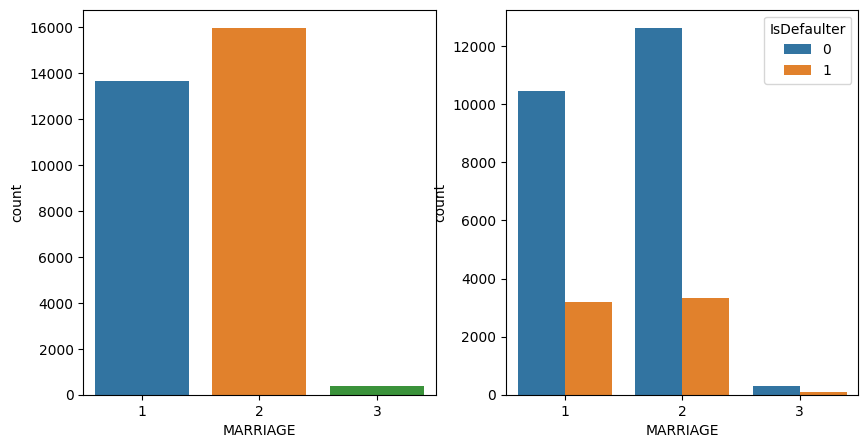

In [21]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df)

In [22]:
#age wise values of credit card holder
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

<Axes: xlabel='AGE', ylabel='count'>

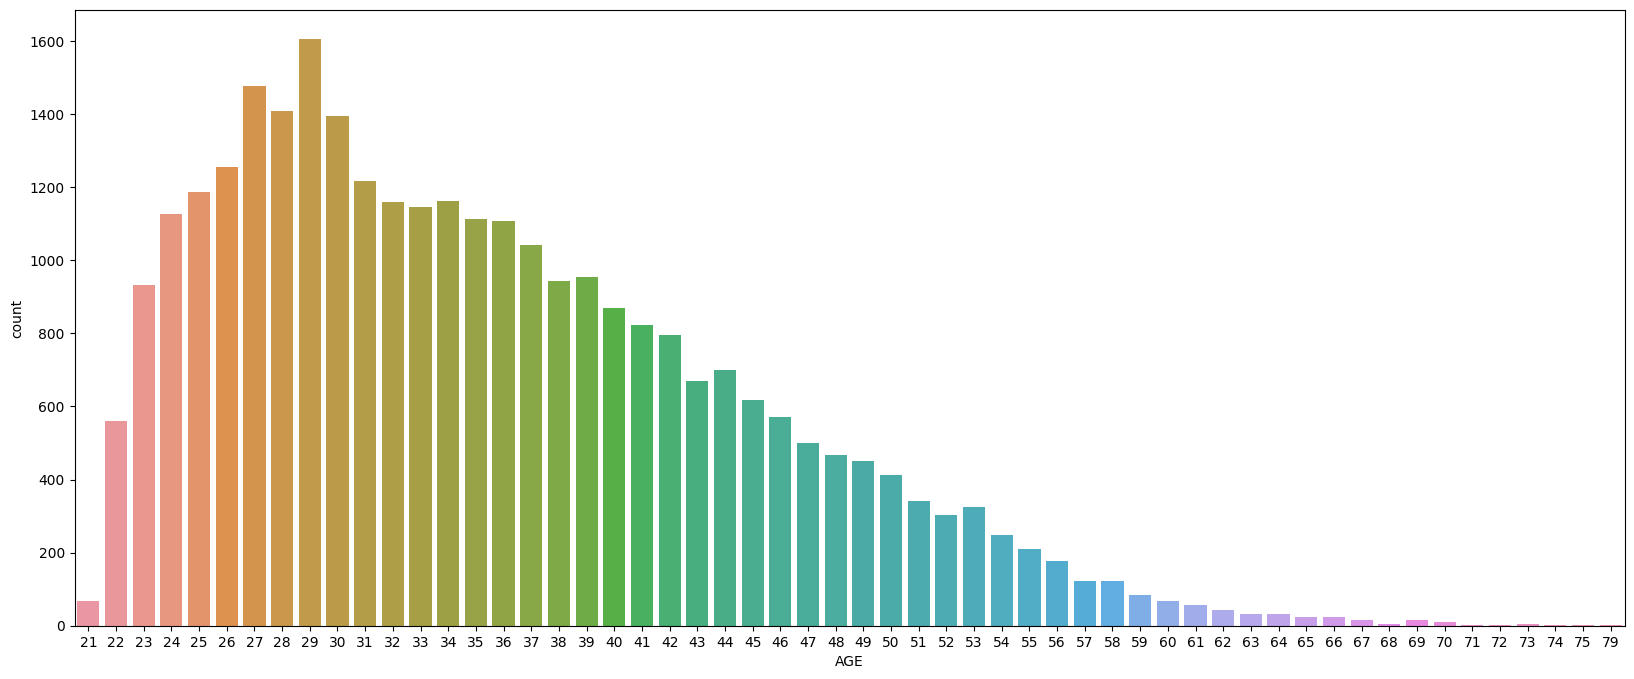

In [23]:
#values count for AGE 
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df)

<Axes: xlabel='AGE', ylabel='count'>

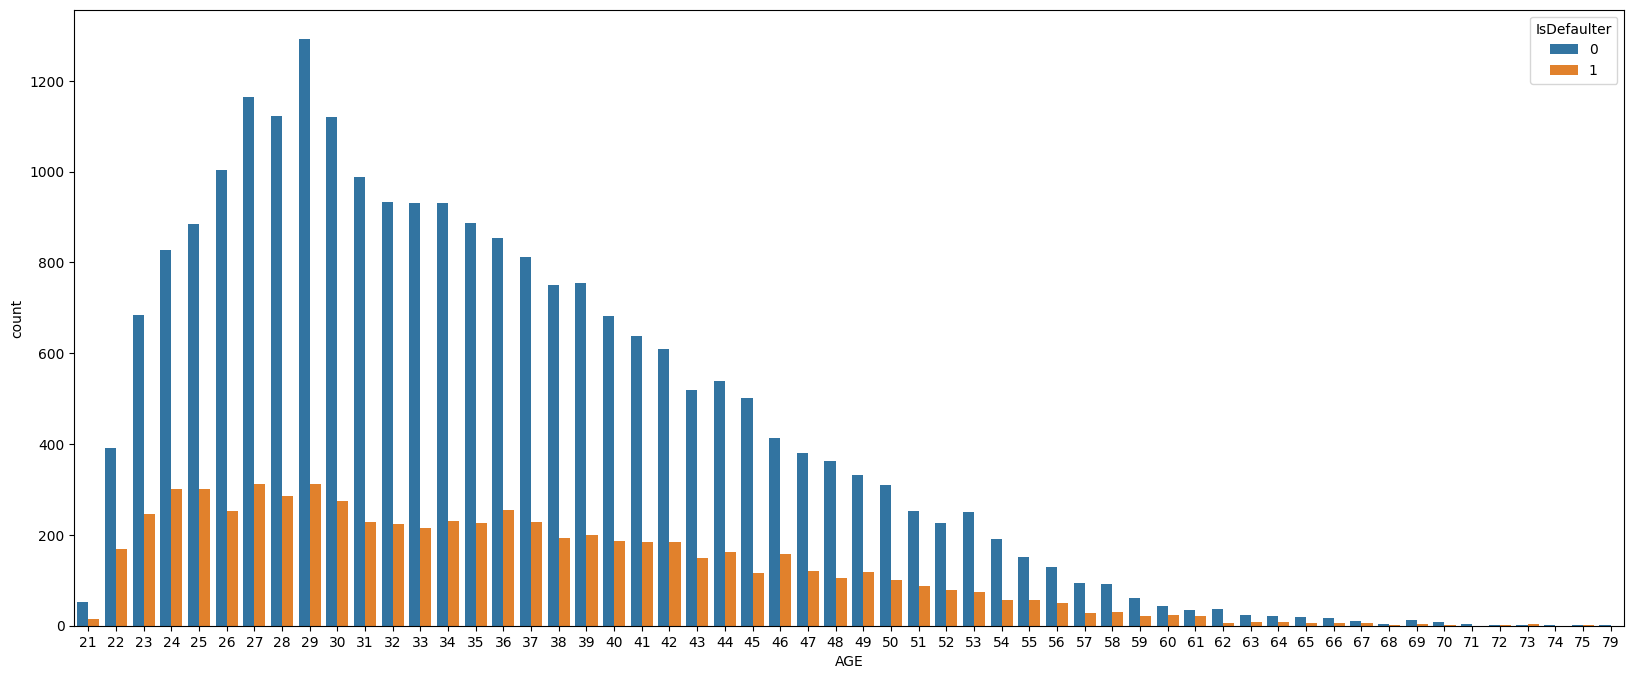

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df)

In [25]:
df['LIMIT_BAL'].max()

1000000

In [26]:
df['LIMIT_BAL'].min()

10000

In [27]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

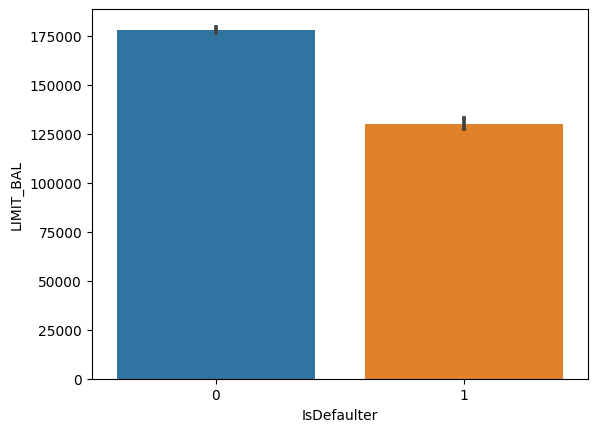

In [28]:
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=df)

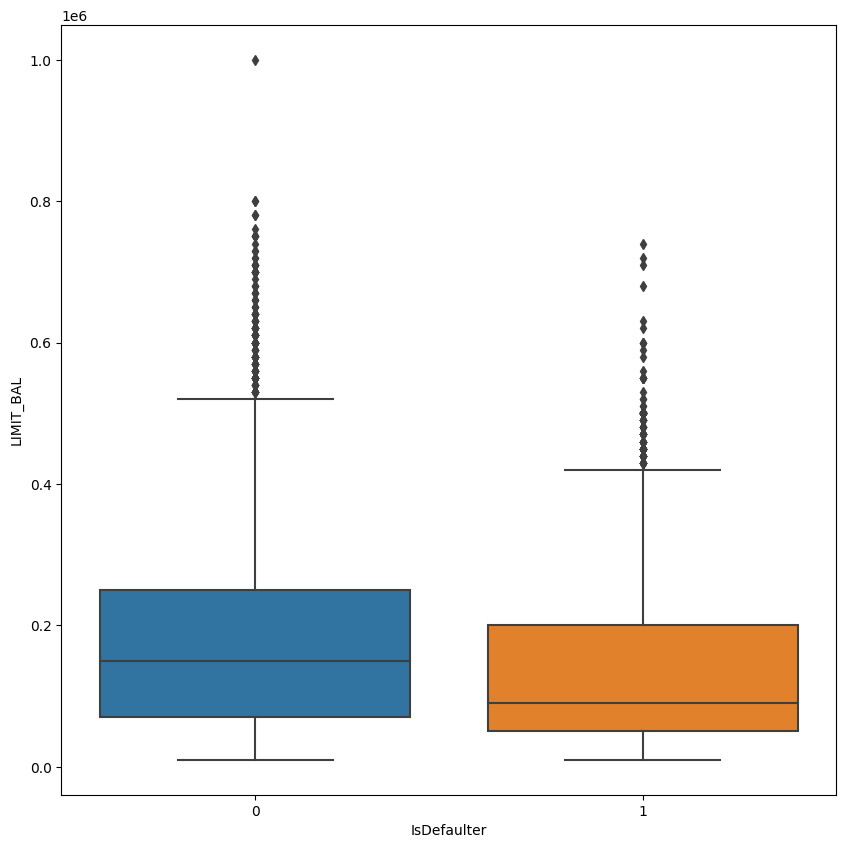

In [29]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="LIMIT_BAL", data=df)

In [30]:
df.groupby('IsDefaulter')['AGE'].mean()

IsDefaulter
0    35.417266
1    35.725738
Name: AGE, dtype: float64

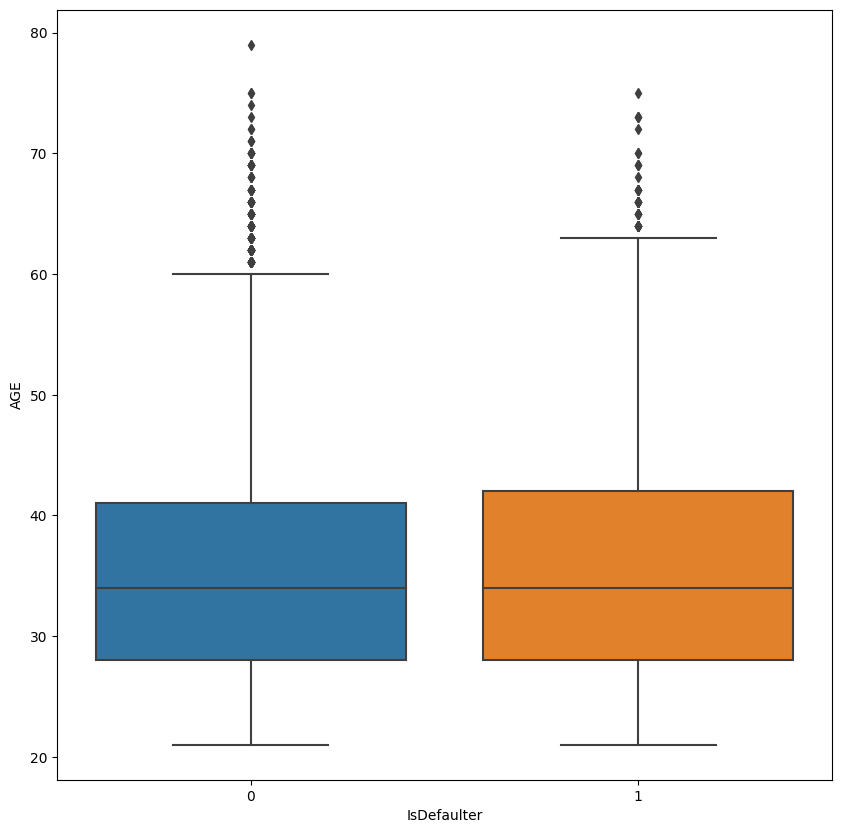

In [31]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=df)

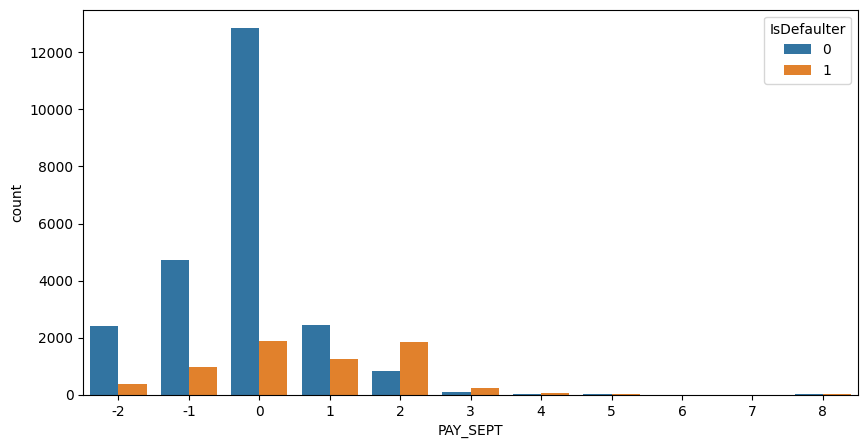

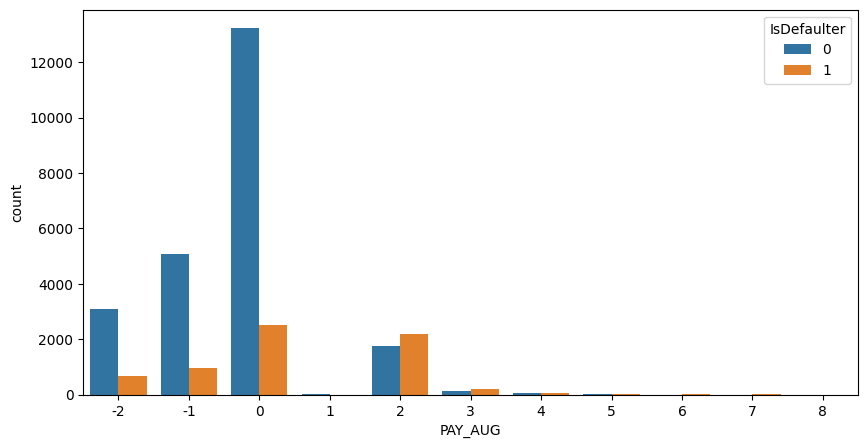

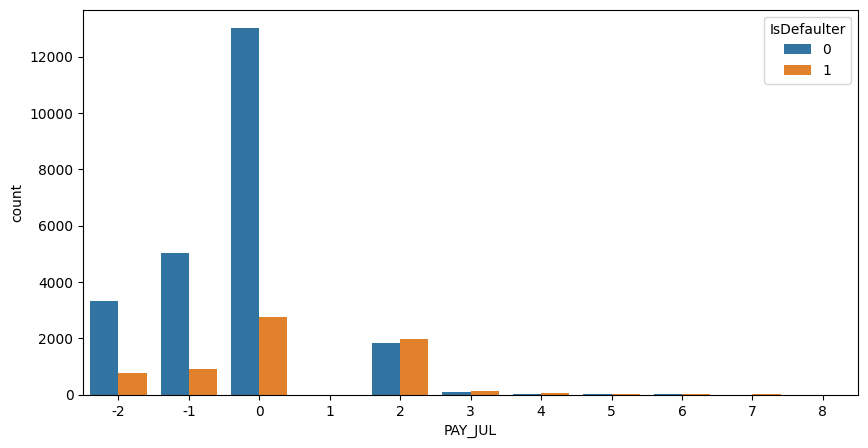

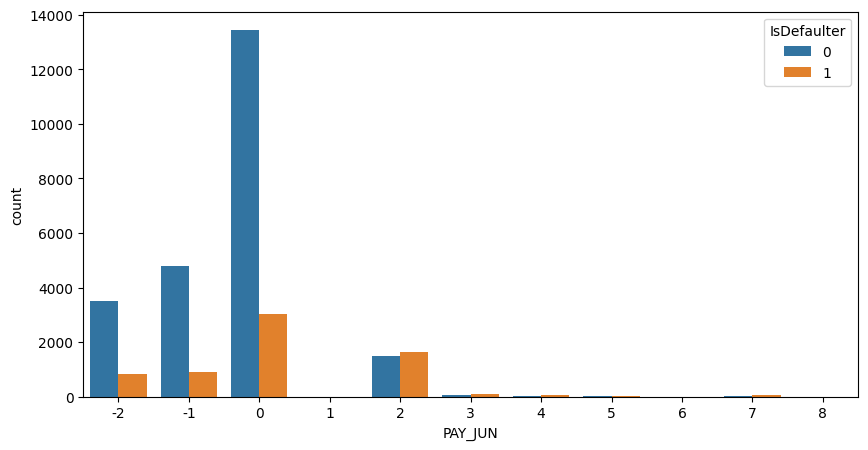

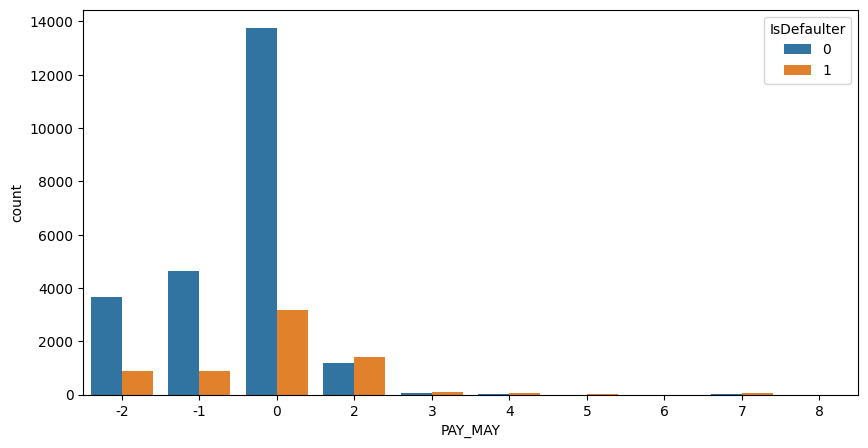

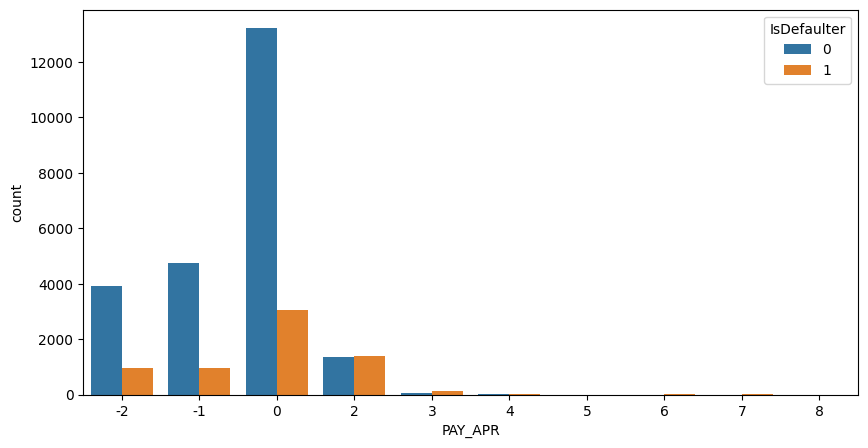

In [32]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = df)

In [33]:
df.shape

(30000, 25)

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [35]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,8308,20000,1,1,1,26,1,0,0,0,...,19832,14054,10397,19497,2000,4722,316,314,11449,324
46724,1228,30000,2,2,1,26,0,0,0,0,...,29428,24823,21524,6866,926,1463,769,2098,4314,126
46725,26264,306106,1,2,1,44,0,0,0,0,...,235434,232379,233189,231998,236897,8702,8002,10817,8136,6314
46726,7752,360000,2,1,1,40,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [36]:
columns = list(df.columns)

In [37]:
columns.pop()

'IsDefaulter'

In [38]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [39]:
balance_df['IsDefaulter'] = y_smote

In [40]:
balance_df[balance_df['IsDefaulter']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,8308,20000,1,1,1,26,1,0,0,0,...,14054,10397,19497,2000,4722,316,314,11449,324,1
46724,1228,30000,2,2,1,26,0,0,0,0,...,24823,21524,6866,926,1463,769,2098,4314,126,1
46725,26264,306106,1,2,1,44,0,0,0,0,...,232379,233189,231998,236897,8702,8002,10817,8136,6314,1
46726,7752,360000,2,1,1,40,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1


In [41]:
new_df = balance_df.copy()

In [42]:
new_df['Payement_Value'] = new_df['PAY_SEPT'] + new_df['PAY_AUG'] + new_df['PAY_JUL'] + new_df['PAY_JUN'] + new_df['PAY_MAY'] + new_df['PAY_APR']

In [43]:
new_df.groupby('IsDefaulter')['Payement_Value'].mean()

IsDefaulter
0   -1.980140
1    1.649204
Name: Payement_Value, dtype: float64

<Axes: xlabel='IsDefaulter', ylabel='Payement_Value'>

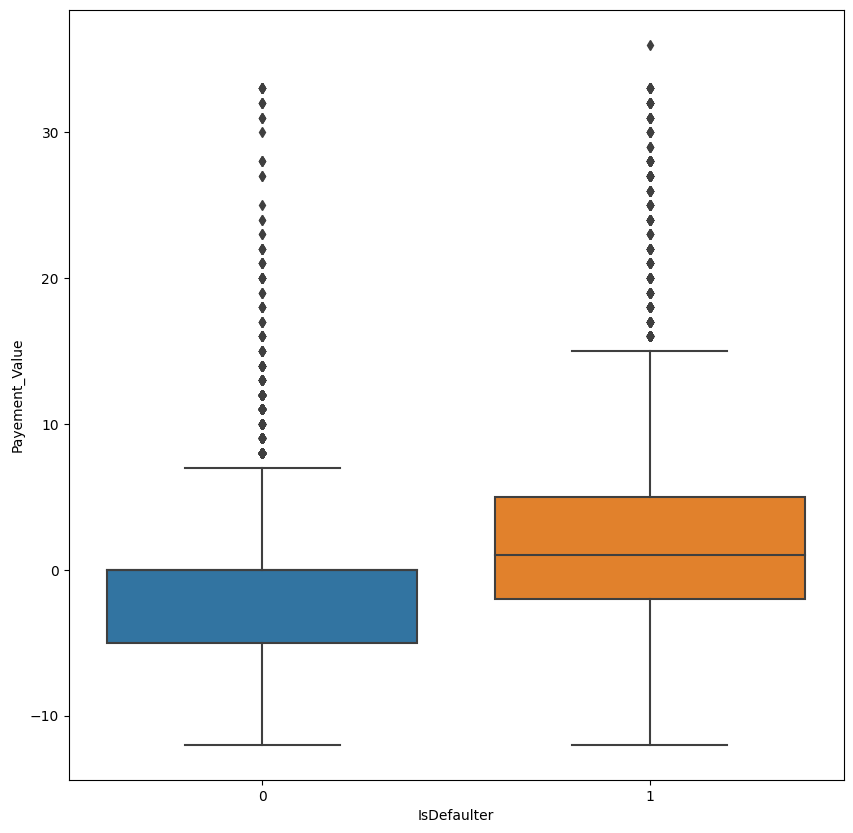

In [44]:
plt.figure(figsize=(10,10))
sns.boxplot(data = new_df, x = 'IsDefaulter', y = 'Payement_Value' )

In [45]:
new_df['Dues'] = (new_df['BILL_AMT_APR']+new_df['BILL_AMT_MAY']+new_df['BILL_AMT_JUN']+new_df['BILL_AMT_JUL']+new_df['BILL_AMT_SEPT'])-(new_df['PAY_AMT_APR']+new_df['PAY_AMT_MAY']+new_df['PAY_AMT_JUN']+new_df['PAY_AMT_JUL']+new_df['PAY_AMT_SEPT'])

In [46]:
new_df.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    194382.516607
1    196710.437425
Name: Dues, dtype: float64

In [47]:
new_df['EDUCATION'].unique()

array([2, 1, 3, 4])

In [48]:
new_df['EDUCATION']=np.where(new_df['EDUCATION'] == 6, 4,new_df['EDUCATION'])
new_df['EDUCATION']=np.where(new_df['EDUCATION'] == 0, 4, new_df['EDUCATION'])

In [49]:
new_df['MARRIAGE'].unique()

array([1, 2, 3])

In [50]:
new_df['MARRIAGE']=np.where(new_df['MARRIAGE'] == 0, 3, new_df['MARRIAGE'])

In [51]:
new_df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE':{1:'married',2:'single',3:'others'}})

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,4602
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,11352
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,78108
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,176732
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,81301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,8308,20000,MALE,graduate school,married,26,1,0,0,0,...,19497,2000,4722,316,314,11449,324,1,1,67051
46724,1228,30000,FEMALE,university,married,26,0,0,0,0,...,6866,926,1463,769,2098,4314,126,1,0,102690
46725,26264,306106,MALE,university,married,44,0,0,0,0,...,231998,236897,8702,8002,10817,8136,6314,1,0,776890
46726,7752,360000,FEMALE,graduate school,married,40,1,-2,-2,-2,...,0,0,0,0,0,0,0,1,-9,0


In [52]:
new_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,4602
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,11352
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,78108
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,176732
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,81301


In [53]:
new_df = pd.get_dummies(new_df, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [54]:
new_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,2,2,1,24,3913,3102,689,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,2,2,2,26,2682,1725,2682,3272,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,2,2,2,34,29239,14027,13559,14331,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,2,2,1,37,46990,48233,49291,28314,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,2,1,57,8617,5670,35835,20940,...,0,1,0,0,0,0,0,0,0,0


In [55]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
new_df = new_df.replace(encoders_nums)

In [56]:
new_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,2,2,1,24,3913,3102,689,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,2,2,2,26,2682,1725,2682,3272,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,2,2,2,34,29239,14027,13559,14331,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,2,2,1,37,46990,48233,49291,28314,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,2,1,57,8617,5670,35835,20940,...,0,1,0,0,0,0,0,0,0,0


In [57]:
new_df.drop('ID',axis = 1, inplace = True)

In [58]:
new_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,2,2,1,24,3913,3102,689,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,2,2,2,26,2682,1725,2682,3272,3455,...,0,0,0,1,0,0,0,0,0,0
2,90000,2,2,2,34,29239,14027,13559,14331,14948,...,0,1,0,0,0,0,0,0,0,0
3,50000,2,2,1,37,46990,48233,49291,28314,28959,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,2,1,57,8617,5670,35835,20940,19146,...,0,1,0,0,0,0,0,0,0,0


In [59]:
x = new_df.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = new_df['IsDefaulter']

In [60]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'PAY_SEPT_-1',
       'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4',
       'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_AUG_-1',
       'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4',
       'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JUL_-1',
       'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4',
       'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-1',
       'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3', 'PAY_JUN_4',
       'PAY_JUN_5', 'PAY_JUN_6', 'PAY_JUN_7', 'PAY_JUN_8', 'PAY_MAY_-1',
       'PAY_MAY_0', 'PAY_MAY_1', 'PAY_MAY_2', 'PAY_MAY_3', 'PAY_MAY_4',
       'PAY_MAY_5', 'PAY_MAY_6', 'PAY_MAY_7', 'PAY_MAY_8

In [61]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify = y)

In [63]:
x_train

array([[-0.10802694, -1.01227357, -1.08342717, ..., -0.03494732,
        -0.04141222, -0.00654238],
       [-0.34636947,  0.98787525,  0.34932746, ..., -0.03494732,
        -0.04141222, -0.00654238],
       [ 0.52755315, -1.01227357,  0.34932746, ..., -0.03494732,
        -0.04141222, -0.00654238],
       ...,
       [-0.98194956, -1.01227357,  1.78208208, ..., -0.03494732,
        -0.04141222, -0.00654238],
       [ 0.60700066, -1.01227357, -1.08342717, ..., -0.03494732,
        -0.04141222, -0.00654238],
       [-0.18747445, -1.01227357, -1.08342717, ..., -0.03494732,
        -0.04141222, -0.00654238]])

In [64]:
x_test

array([[ 1.40147578,  0.98787525,  0.34932746, ..., -0.03494732,
        -0.04141222, -0.00654238],
       [-0.82305454,  0.98787525, -1.08342717, ..., -0.03494732,
        -0.04141222, -0.00654238],
       [ 0.44810564,  0.98787525,  0.34932746, ..., -0.03494732,
        -0.04141222, -0.00654238],
       ...,
       [ 0.1303156 , -1.01227357,  0.34932746, ..., -0.03494732,
        -0.04141222, -0.00654238],
       [ 1.49392885, -1.01227357, -1.08342717, ..., -0.03494732,
        -0.04141222, -0.00654238],
       [-0.82305454, -1.01227357,  0.34932746, ..., -0.03494732,
        -0.04141222, -0.00654238]])

In [65]:
#fitting data into Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [66]:
#class prediction of y
y_pred_lr = lr.predict(x_test)
y_train_pred_lr=lr.predict(x_train)

In [67]:
#getting all scores for Logistic Regression
train_accuracy_lr = round(accuracy_score(y_train_pred_lr,y_train),4)
accuracy_lr = round(accuracy_score(y_pred_lr,y_test),4)
precision_score_lr = round(precision_score(y_pred_lr,y_test),4)
recall_score_lr = round(recall_score(y_pred_lr,y_test),4)
f1_score_lr = round(f1_score(y_pred_lr,y_test),4)
roc_score_lr = round(roc_auc_score(y_pred_lr,y_test),4)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", accuracy_lr)
print("The precision on test data is ", precision_score_lr)
print("The recall on test data is ", recall_score_lr)
print("The f1 on test data is ", f1_score_lr)
print("The roc_score on test data is ", roc_score_lr)

The accuracy on train data is  0.7538
The accuracy on test data is  0.7522
The precision on test data is  0.6921
The recall on test data is  0.7867
The f1 on test data is  0.7363
The roc_score on test data is  0.7559


[[3796  877]
 [1439 3234]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

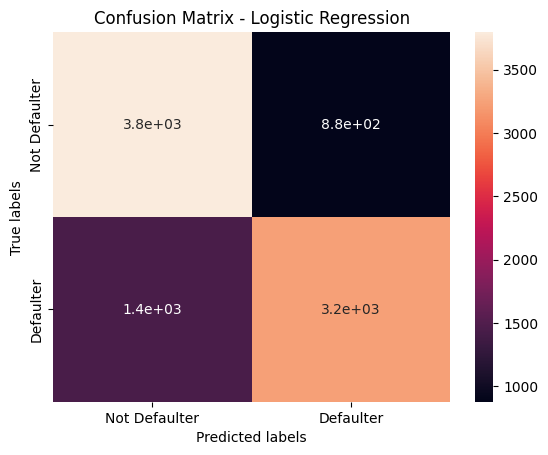

In [68]:
# Get the confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm_logi = confusion_matrix(y_test, y_pred_lr)
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [73]:
#class prediction of y
y_train_pred_dtc=dtc.predict(x_train)
y_pred_dtc = dtc.predict(x_test)

In [74]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 4)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 4)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 4)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 4)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 4)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 4)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  0.9991
The accuracy on test data is  0.755
The precision on test data is  0.7659
The recall on test data is  0.7495
The f1 on test data is  0.7576
The roc_score on test data is  0.7551


[[3477 1196]
 [1094 3579]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

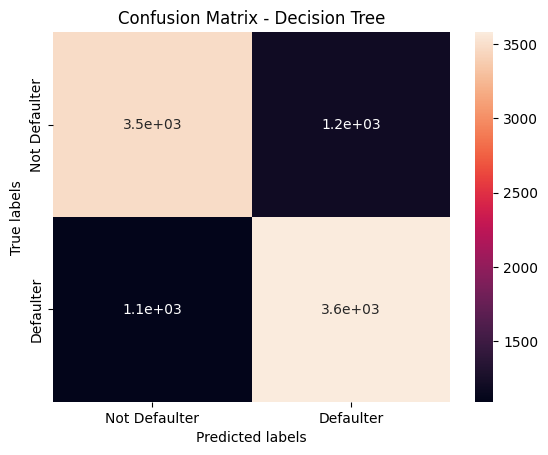

In [75]:
# Get the confusion matrix for decision tree classifier
labels = ['Not Defaulter', 'Defaulter']
cm_dtc = confusion_matrix(y_test, y_pred_dtc )
print(cm_dtc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [76]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [78]:
#class prediction of y
y_train_pred_rfc=rfc.predict(x_train)
y_pred_rfc=rfc.predict(x_test)

In [79]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 4)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 4)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 4)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 4)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 4)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 4)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.999
The accuracy on test data is  0.839
The precision on test data is  0.8042
The recall on test data is  0.8643
The f1 on test data is  0.8332
The roc_score on test data is  0.8406


[[4083  590]
 [ 915 3758]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

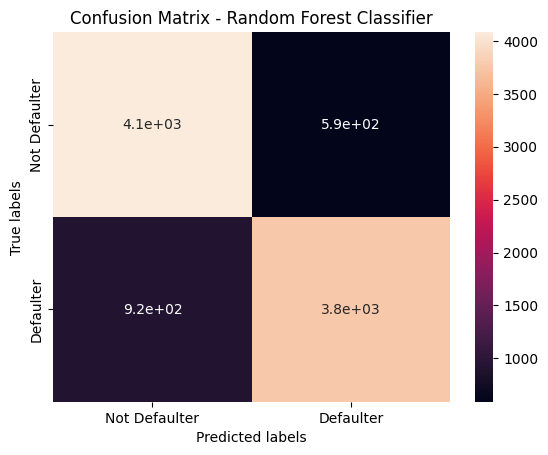

In [80]:
# Get the confusion matrix for Random Forest Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [81]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(x_train, y_train)


GradientBoostingClassifier(random_state=42)

In [83]:
#class prediction of y
y_pred_gbc=gbc.predict(x_test)
y_train_pred_gbc=gbc.predict(x_train)

In [84]:
#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train),4)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test),4)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test),4)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test),4)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test),4)
roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test),4)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.7875
The accuracy on test data is  0.7842
The precision on test data is  0.7323
The recall on test data is  0.8171
The f1 on test data is  0.7724
The roc_score on test data is  0.7873


[[3907  766]
 [1251 3422]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

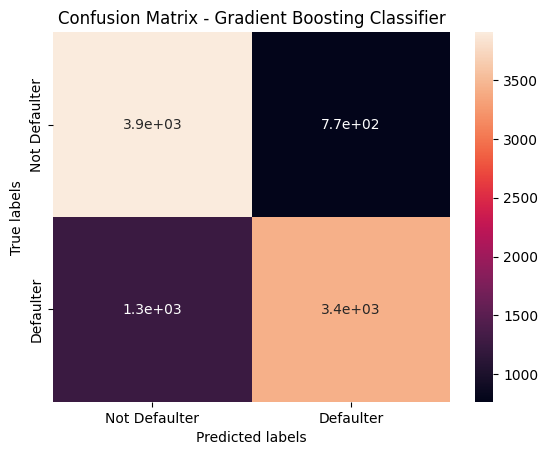

In [85]:
# Get the confusion matrix for Gradient Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [86]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier

In [87]:
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [88]:
#class prediction of y
y_pred_xgb=xgb.predict(x_test)
y_train_pred_xgb=xgb.predict(x_train)

In [89]:
#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train),4)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test),4)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test),4)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test),4)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test),4)
roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test),4)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  0.8805
The accuracy on test data is  0.8228
The precision on test data is  0.7879
The recall on test data is  0.847
The f1 on test data is  0.8164
The roc_score on test data is  0.8244


[[4008  665]
 [ 991 3682]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

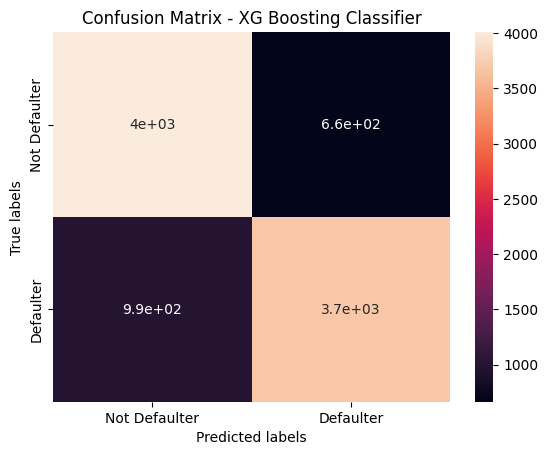

In [90]:
# Get the confusion matrix for XG Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_xgb = confusion_matrix(y_test, y_pred_xgb )
print(cm_xgb)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XG Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [91]:
all_lassifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest','Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_lr, train_accuracy_dtc, train_accuracy_rfc,train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_lr, accuracy_dtc, accuracy_rfc,accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_lr, precision_score_dtc, precision_score_rfc,precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_lr, recall_score_dtc, recall_score_rfc,recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_lr, f1_score_dtc, f1_score_rfc,f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_lr, roc_score_dtc, roc_score_rfc,roc_score_gbc, roc_score_xgb]

In [92]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall':all_recall_score,'F1 Score':all_f1_score,'AUC':all_auc_score})

In [93]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.7538,0.7522,0.6921,0.7867,0.7363,0.7559
1,Decision Tree,0.9991,0.7550,0.7659,0.7495,0.7576,0.7551
2,Random Forest,0.9990,0.8390,0.8042,0.8643,0.8332,0.8406
3,Gradient Boosting,0.7875,0.7842,0.7323,0.8171,0.7724,0.7873
4,XG Boosting,0.8805,0.8228,0.7879,0.8470,0.8164,0.8244


In [94]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
2,Random Forest,0.9990,0.8390,0.8042,0.8643,0.8332,0.8406
4,XG Boosting,0.8805,0.8228,0.7879,0.8470,0.8164,0.8244
3,Gradient Boosting,0.7875,0.7842,0.7323,0.8171,0.7724,0.7873
1,Decision Tree,0.9991,0.7550,0.7659,0.7495,0.7576,0.7551
0,Logistic Regression,0.7538,0.7522,0.6921,0.7867,0.7363,0.7559


In [95]:
#importing roc curve
from sklearn.metrics import roc_curve

In [98]:
#probabilty prediction of y for all model
y_pred_proba_lr = lr.predict_proba(x_test)[:,1]
y_pred_proba_dtc = dtc.predict_proba(x_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(x_test)[:,1]
y_pred_proba_gbc = gbc.predict_proba(x_test)[:,1]
y_pred_proba_xgb = xgb.predict_proba(x_test)[:,1]

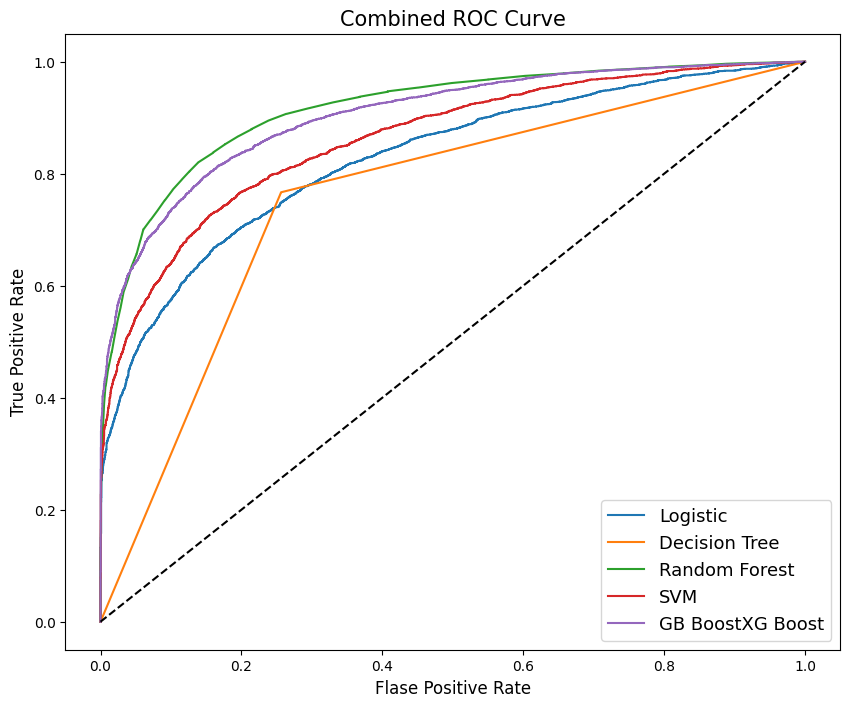

In [99]:
fig = plt.figure(figsize=(10,8)) 

fpr_lr, tpr_lr, _lr = roc_curve(y_test,  y_pred_proba_lr)
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,  y_pred_proba_dtc)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_gbc, tpr_gbc, _gbc = roc_curve(y_test,  y_pred_proba_gbc)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)

plt.plot(fpr_lr, tpr_lr)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_gbc, tpr_gbc)
plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic", "Decision Tree", "Random Forest", "SVM", "GB Boost" "XG Boost"], prop={'size':13}, loc='lower right' )

In [100]:
from sklearn.model_selection import GridSearchCV

In [125]:
# penalty in Logistic Regression Classifier
penalties = ['l1','l2', 'elasticnet', 'none']

# hyperparameter C
C= [0.0001, 0.001, 0.1, 0.5, 0.75, 1, 1.25, 1.5, 5, 10]

# Hyperparameter Grid
param_dict = {'penalty':penalties,
              'max_iter' : [100, 1000,2500, 5000],
              'C' : C }

In [127]:
# Create an instance of the Logistic Regression
lr = LogisticRegression()

# Grid search
lr_grid = GridSearchCV(estimator=lr,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')

In [104]:
# The maximum depth of the tree
depth_of_tree = [20,25,30,35]

In [105]:
# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

In [106]:
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]


In [107]:
# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [108]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

In [109]:

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
dtc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30, 35],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='roc_auc', verbose=3)

In [110]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=35, min_samples_leaf=40,
                       min_samples_split=0.001)

In [111]:
dtc_grid.best_params_

{'max_depth': 35, 'min_samples_leaf': 40, 'min_samples_split': 0.001}

In [112]:
dtc_optimized_model = dtc_grid.best_estimator_

In [113]:
#class prediction of y on train and test
y_pred_dtc_grid=dtc_optimized_model.predict(x_test)
y_train_pred_dtc_grid=dtc_optimized_model.predict(x_train)

In [114]:
# Get the probabilities on train and test
y_pred_prob_dtc_grid = dtc_optimized_model.predict_proba(x_train)[:,1]
y_train_pred_prob_dtc_grid = dtc_optimized_model.predict_proba(x_test)[:,1]

In [115]:
#getting all scores for decision tree after CV and Hyperparameter Tunning
train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train),4)
accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test),4)
precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test),4)
recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test),4)
f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test),4)
auc_dtc_grid = round(roc_auc_score(y_pred_dtc_grid,y_test),4)

print("The accuracy on train data is ", train_accuracy_dtc_grid)
print("The accuracy on test data is ", accuracy_dtc_grid)
print("The precision on test data is ", precision_score_dtc_grid)
print("The recall on test data is ", recall_score_dtc_grid)
print("The f1 on test data is ", f1_score_dtc_grid)
print("The auc on test data is ", auc_dtc_grid)

The accuracy on train data is  0.792
The accuracy on test data is  0.7492
The precision on test data is  0.7212
The recall on test data is  0.764
The f1 on test data is  0.742
The auc on test data is  0.75


In [116]:
# Get the confusion matrices for train and test
train_cm_dtc_grid = confusion_matrix(y_train,y_train_pred_dtc_grid)
test_cm_dtc_grid = confusion_matrix(y_test,y_pred_dtc_grid )

In [117]:
train_cm_dtc_grid

array([[15338,  3353],
       [ 4422, 14269]])

In [118]:
test_cm_dtc_grid

array([[3632, 1041],
       [1303, 3370]])

In [129]:
# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

In [130]:
# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [131]:
# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier()

In [133]:
# Grid search
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')
# fitting model
rfc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   5.8s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   6.3s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.8s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   5.4s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   5.6s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   7.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   8.7s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   8.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   7.9s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=2)